In [41]:
import json
from collections import defaultdict

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from sklearn.linear_model import LinearRegression

from scipy import stats

In [2]:
c = 1 / np.log(2)

In [3]:
parameter_scaling_alphas = []
parameter_scaling_Ps = []
parameter_scaling_losses = []
parameter_scaling_loss_curves = dict()
parameter_scaling_log_steps = dict()
parameter_scaling_subtask_losses = dict()
for i in tqdm(range(1, 45, 1)):
    try:
        with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-15/{i}/config.json", 'r') as f:
            config = json.load(f)
            parameter_scaling_alphas.append(config['alpha'])
        with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-15/{i}/info.json", 'r') as f:
            info = json.load(f)
            if info['P'] in parameter_scaling_Ps:
                continue
            parameter_scaling_losses.append(info['losses'][-1]*c)
            parameter_scaling_loss_curves[info['P']] = np.array(info['losses'])*c
            parameter_scaling_log_steps[info['P']] = info['log_steps']
            parameter_scaling_subtask_losses[info['P']] = [info['losses_subtasks'][str(i)][-1]*c for i in range(500)]
            parameter_scaling_Ps.append(info['P'])
            print(i, info['P'], config['width'])
    except Exception as e:
        print(e)

assert all([x == parameter_scaling_alphas[0] for x in parameter_scaling_alphas])
parameter_scaling_alpha = parameter_scaling_alphas[0]

  0%|          | 0/44 [00:00<?, ?it/s]

1 5429 9
2 6635 11
Expecting ',' delimiter: line 1778962 column 25 (char 33554432)
4 8444 14
5 10253 17
6 15077 25
7 17489 29
8 19901 33
9 22916 38
10 39800 66
11 45227 75
12 51860 86
13 59699 99
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-15/14/config.json'
15 101909 169
16 116984 194
17 133868 222
18 153164 254
19 175475 291
20 229745 381
21 262910 436
22 200801 333
23 301502 500
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-15/24/config.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-15/25/config.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-15/26/config.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/P-scaling-15/27/config.json'
28 89246 148
29 7841 13
30 11459 19
31 13268 22
32 26534 44
33 30152 50
34 34373 57
35 68141 113
36 77789 12

In [4]:
data_scaling_alphas = []
data_scaling_Ds = []
data_scaling_losses = []
data_scaling_subtask_losses = dict()
min_idxs = []
for i in tqdm(range(1, 31, 1)):
    try:
        with open(f"/om/user/ericjm/results/the-everything-machine/D-scaling-6/{i}/config.json", 'r') as f:
            config = json.load(f)
            data_scaling_alphas.append(config['alpha'])
        with open(f"/om/user/ericjm/results/the-everything-machine/D-scaling-6/{i}/info.json", 'r') as f:
            info = json.load(f)
            min_idx = min(list(range(len(info['losses']))), key=lambda i: info['losses'][i])
            min_idxs.append(min_idx)
            data_scaling_losses.append(info['losses'][min_idx]*c)
            data_scaling_subtask_losses[info['D']] = [info['losses_subtasks'][str(i)][min_idx]*c for i in range(200)]
            data_scaling_Ds.append(info['D'])
            print(i, info['P'], config['D'], config['width'])
    except Exception as e:
        print(e)

  0%|          | 0/30 [00:00<?, ?it/s]

1 301502 15350 500
2 301502 12389 500
3 301502 9999 500
4 301502 19019 500
5 301502 23565 500
6 301502 29197 500
7 301502 36174 500
8 301502 68803 500
9 301502 44820 500
10 301502 55532 500
11 301502 85247 500
12 301502 105620 500
13 301502 130862 500
14 301502 162137 500
15 301502 200886 500
16 301502 248896 500
17 301502 308380 500
18 301502 382080 500
19 301502 473394 500
20 301502 586530 500
21 301502 726705 500
22 301502 900381 500
23 301502 1115563 500
24 301502 1382173 500
25 301502 1712499 500
26 301502 2121769 500
27 301502 2628852 500
28 301502 3257122 500
29 301502 4035543 500
30 301502 4999999 500


In [8]:
with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-15/23/config.json", 'r') as f:
    config_parameter = json.load(f)
with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-15/23/info.json", 'r') as f:
    info_parameter = json.load(f)

In [14]:
with open(f"/om/user/ericjm/results/the-everything-machine/D-scaling-6/30/config.json", 'r') as f:
    config_data = json.load(f)
with open(f"/om/user/ericjm/results/the-everything-machine/D-scaling-6/30/info.json", 'r') as f:
    info_data = json.load(f)
    min_idx = min(list(range(len(info_data['losses']))), key=lambda i: info_data['losses'][i])

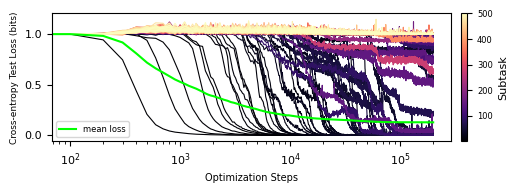

In [10]:
fig = plt.figure(figsize=(5.5, 1.75))

ax = plt.subplot(1, 1, 1)

Ss = info_parameter['Ss']

plt.plot(info_parameter['log_steps'], np.array(info_parameter['losses'])*c, color='lime', label="mean loss")

colors = plt.cm.magma(np.linspace(0.0, 1.0, len(Ss)))
for i in range(len(Ss)):
    plt.plot(info_parameter['log_steps'], np.array(info_parameter['losses_subtasks'][str(i)])*c, color=colors[i], alpha=1.0, zorder=-10, linewidth=0.8)

# add a colorbar from the range 1 to len(Ss)
cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=1, vmax=len(Ss)), cmap='magma'), ax=ax, pad=0.02)
cbar.ax.tick_params(labelsize=6)
cbar.ax.set_ylabel("Subtask", fontsize=8)

# plt.xticklabels(fontsize=8)
# plt.yticklabels(fontsize=8)

# plt.xlim(0, 1000)
plt.ylabel("Cross-entropy Test Loss (bits)", fontsize=6.5)
plt.xlabel("Optimization Steps", fontsize=7)
plt.xscale('log')
plt.xticks([1e2, 1e3, 1e4, 1e5], fontsize=8)
plt.yticks(fontsize=8)
# plt.yscale('log')

# plt.ylim(0.1, 1)

plt.legend(loc='lower left', prop={'size': 6})

left = max(fig.subplotpars.left, 1 - fig.subplotpars.right)
bottom = max(fig.subplotpars.bottom, 1 - fig.subplotpars.top)
fig.subplots_adjust(left=left, right=.90)
# plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.subplots_adjust(left=0.125, right=1.0, top=0.96, bottom=0.23)

# plt.tight_layout(pad=0.1)
# plt.savefig('../figures/parity-subtask-timeseries-4-new-wide.jpg', dpi=350)


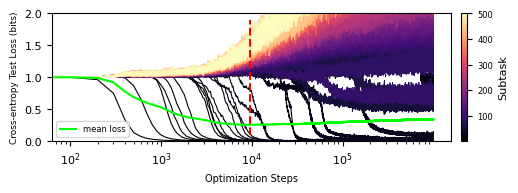

In [22]:
fig = plt.figure(figsize=(5.5, 1.75))

ax = plt.subplot(1, 1, 1)

Ss = info_data['Ss']

plt.plot(info_data['log_steps'], np.array(info_data['losses'])*c, color='lime', label="mean loss")

colors = plt.cm.magma(np.linspace(0.0, 1.0, len(Ss)))
for i in range(len(Ss)):
    plt.plot(info_data['log_steps'], np.array(info_data['losses_subtasks'][str(i)])*c, color=colors[i], alpha=1.0, zorder=-10, linewidth=0.8)

# add a colorbar from the range 1 to len(Ss)
cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=1, vmax=len(Ss)), cmap='magma'), ax=ax, pad=0.02)
cbar.ax.tick_params(labelsize=6)
cbar.ax.set_ylabel("Subtask", fontsize=8)

# plt.xticklabels(fontsize=8)
# plt.yticklabels(fontsize=8)

# plt.xlim(0, 1000)
plt.ylabel("Cross-entropy Test Loss (bits)", fontsize=6.5)
plt.xlabel("Optimization Steps", fontsize=7)
plt.xscale('log')
plt.xticks([1e2, 1e3, 1e4, 1e5], fontsize=8)
plt.yticks(fontsize=8)
# plt.yscale('log')

plt.plot([100*min_idx]*2, [0.1, 1.9], color='red', linestyle='dashed')

plt.ylim(0, 2)

plt.legend(loc='lower left', prop={'size': 6})

left = max(fig.subplotpars.left, 1 - fig.subplotpars.right)
bottom = max(fig.subplotpars.bottom, 1 - fig.subplotpars.top)
fig.subplots_adjust(left=left, right=.90)
# plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.subplots_adjust(left=0.125, right=1.0, top=0.96, bottom=0.23)

# plt.tight_layout(pad=0.1)
# plt.savefig('../figures/parity-subtask-timeseries-4-new-wide.jpg', dpi=350)


### Plot convergence time versus frequency

In [87]:
with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-15/23/config.json", 'r') as f:
    config_parameter = json.load(f)
with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-15/23/info.json", 'r') as f:
    info_parameter = json.load(f)

In [88]:
list(info_parameter)

['D',
 'P',
 'Ss',
 'accuracies',
 'accuracies_subtasks',
 'log_steps',
 'losses',
 'losses_subtasks']

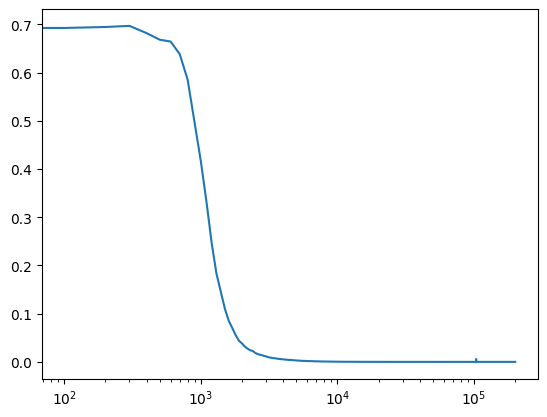

In [89]:
plt.plot(list(range(0, 200000, 100)), info_parameter['losses_subtasks']['2'])
plt.xscale('log')

In [90]:
alpha = config_parameter['alpha']
offset = config_parameter['offset']
n_tasks = config_parameter['n_tasks']

In [91]:
probs = np.array([np.power(n, -alpha) for n in range(1+offset, n_tasks+offset+1)])
probs = probs / np.sum(probs)
indexes = []
steps_to_convergence = []
frequencies = []
for i in range(n_tasks):
    # compute the first index where the loss is below 0.1
    indices_below_threshold = list(filter(lambda s: info_parameter['losses_subtasks'][str(i)][s]*c < 0.1, range(len(info_parameter['losses_subtasks'][str(i)]))))
    if indices_below_threshold:
        steps_to_convergence.append(info_parameter['log_steps'][indices_below_threshold[0]])
        frequencies.append(probs[i])
        indexes.append(i)

In [92]:
frequencies = np.array(frequencies)
steps_to_convergence = np.array(steps_to_convergence)

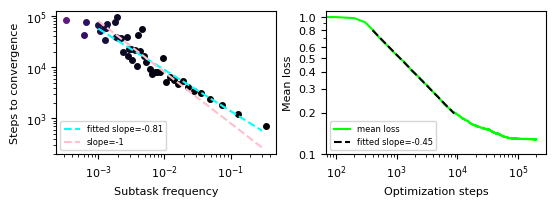

In [94]:
plt.figure(figsize=(5.5, 2))

plt.subplot(1, 2, 1)

colors = plt.cm.magma(np.linspace(0.0, 1.0, n_tasks))
# plt.plot(frequencies, steps_to_convergence, 'o')
# rewrite the previous line so that the points are colored by the subtask
for i, idx in enumerate(indexes):
    plt.plot(frequencies[i], steps_to_convergence[i], 'o', color=colors[idx], markersize=4)

# perform linear regression and plot result on top of the points. use 
reg = LinearRegression().fit(np.log(frequencies).reshape(-1, 1), np.log(steps_to_convergence))
reg_ys = np.exp(reg.intercept_) * np.power(frequencies, reg.coef_[0])
xs = np.linspace(1e-3, 3e-1, 100)
ys = np.exp(reg.intercept_) * np.power(xs, reg.coef_[0])
plt.plot(xs, ys, color='cyan', linestyle='dashed', label="fitted slope={:.2f}".format(reg.coef_[0]), zorder=10)
plt.plot(xs, 80/xs, color='pink', linestyle='dashed', label="slope=-1", zorder=10)

plt.xlabel("Subtask frequency", fontsize=8)
plt.ylabel("Steps to convergence", fontsize=8)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)

plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower left', prop={'size': 6})

plt.subplot(1, 2, 2)

plt.plot(info_parameter['log_steps'], np.array(info_parameter['losses'])*c, color='lime', label="mean loss")

i0, i1 = 4, 90
reg = LinearRegression().fit(np.log(np.array(info_parameter['log_steps'])[i0:i1]).reshape(-1, 1), np.log(np.array(info_parameter['losses'])[i0:i1]*c))
reg_ys = np.exp(reg.intercept_) * np.power(np.array(info_parameter['log_steps'])[i0:i1], reg.coef_[0])
# xs = np.linspace(1e-3, 3e-1, 100)
plt.plot(np.array(info_parameter['log_steps'])[i0:i1], reg_ys, color='black', linestyle='dashed', label="fitted slope={:.2f}".format(reg.coef_[0]))

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Optimization steps", fontsize=8)
plt.ylabel("Mean loss", fontsize=8)

yticks = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1.0]
plt.yticks(yticks, yticks, fontsize=8)
plt.xticks(fontsize=8)

plt.legend(loc='lower left', prop={'size': 6})

plt.tight_layout(pad=0.5)
plt.savefig("../figures/sparse-parity-convergence-time.pdf")

